## Housing Price Prediction using Linear regression

## Task - 1

## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/Sunil Kannur/OneDrive/Desktop/-/Elevate Labs Internship/Project - 2/Housing.csv")
print(df.head())  # Check first 5 rows

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


### Preprocess categorical Variables

In [5]:
# Convert 'yes/no' columns to binary (0/1)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

## Split Data into Train sets and Test sets

In [6]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)  # All columns except 'price'
y = df['price']  # Target variable

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (436, 13), Test size: (109, 13)


## Fit a Linear Regression Model

In [7]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

## Evaluate Model Performance

In [8]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
Root Mean Squared Error (RMSE): 1324506.96
R-squared (R²): 0.65


## Plot Regression Line & Interpret Coefficients

### Simple Regression (Single Feature: 'area')

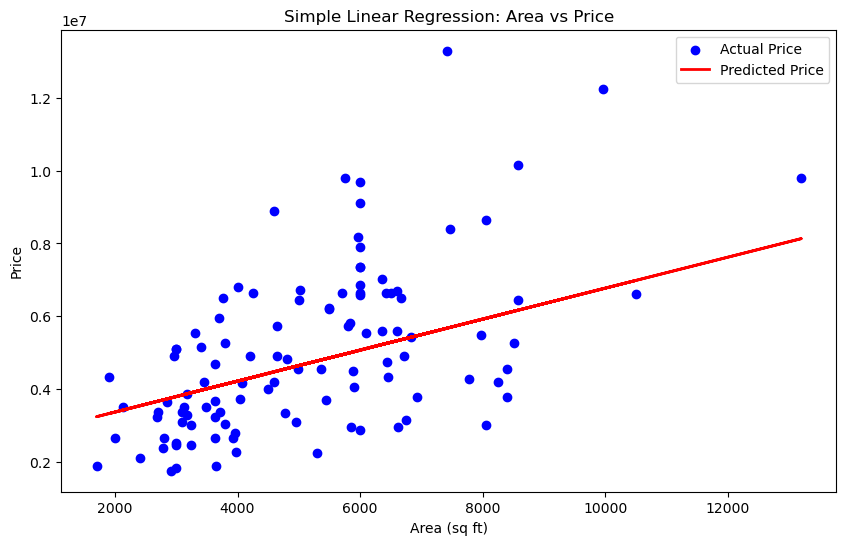

Intercept (baseline price): 2512254.26
Coefficient (price per sq ft): 425.73


In [9]:
# Fit model on 'area' only
X_area = df[['area']]
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y, test_size=0.2, random_state=42)

model_area = LinearRegression()
model_area.fit(X_train_area, y_train_area)
y_pred_area = model_area.predict(X_test_area)

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_area, y_test_area, color='blue', label='Actual Price')
plt.plot(X_test_area, y_pred_area, color='red', linewidth=2, label='Predicted Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Coefficient interpretation
print(f"Intercept (baseline price): {model_area.intercept_:.2f}")
print(f"Coefficient (price per sq ft): {model_area.coef_[0]:.2f}")

### Multiple Regression (All Features)

In [10]:
# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Impact on Price:")
print(coefficients)


Feature Impact on Price:
                            Feature   Coefficient
2                         bathrooms  1.094445e+06
8                   airconditioning  7.914267e+05
7                   hotwaterheating  6.846499e+05
10                         prefarea  6.298906e+05
3                           stories  4.074766e+05
6                          basement  3.902512e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
9                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
